In [5]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

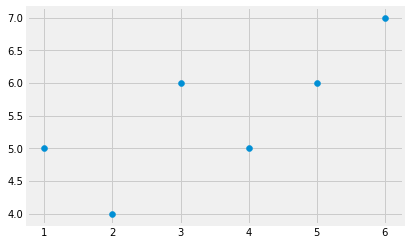

In [6]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

plt.scatter(xs,ys)

In [7]:
def best_fit_slope_and_intercept(xs, ys):
    #formula in a image
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
           ((mean(xs)**2) - mean(xs**2)) )
    
    b = mean(ys) - m*mean(xs)
    return m, b

In [16]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [17]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [18]:
m,b = best_fit_slope_and_intercept(xs, ys)
print(m, b)

0.42857142857142866 4.0


In [19]:
regression_line = [(m*x)+b for x in xs]
print(regression_line)

[4.428571428571429, 4.857142857142858, 5.2857142857142865, 5.714285714285714, 6.142857142857143, 6.571428571428572]


In [20]:
predict_x = 8
predict_y = m*predict_x + b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.5844155844155845


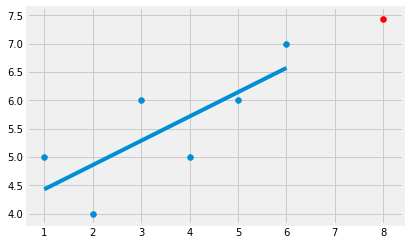

In [13]:
plt.scatter(xs,ys)
plt.plot(xs, regression_line)

plt.scatter(predict_x,predict_y, color="r")
plt.show()